In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Load the image in Grayscale

In [24]:
image = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

2. Normalize image to range [0, 1] as required by 'r'

In [25]:
r = image.astype(float) / 255.0

--- Part (a): Gamma correction with γ=0.5. ---

In [26]:
gamma_a = 0.5
s_a = np.power(r, gamma_a)

--- Part (b):Gamma correction with γ=2.

In [27]:
gamma_b = 2.0
s_b = np.power(r, gamma_b)

--- Part (c):Contrast Stretching (linear piecewise transformation)

In [28]:
r1, r2 = 0.2, 0.8

Initialize output array

In [29]:
s_c = np.zeros_like(r)

Apply the conditions
Condition 1: r < r1 -> becomes 0 (already handled by zeros initialization)

Condition 2: r1 <= r <= r2 -> Apply formula

In [30]:
mask_mid = (r >= r1) & (r <= r2)
s_c[mask_mid] = (r[mask_mid] - r1) / (r2 - r1)

Condition 3: r > r2 -> becomes 1

In [31]:
s_c[r > r2] = 1.0

--- Display Results ---

--- DISPLAY INDIVIDUALLY ---
1. Show Original

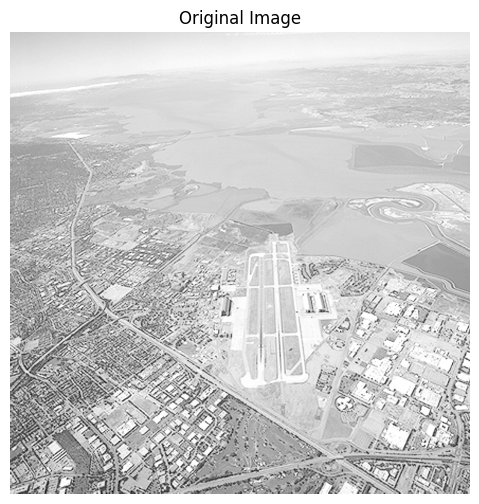

In [32]:
plt.figure(figsize=(6, 6))
plt.imshow(r, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image')
plt.axis('off') # Hides the axes numbers for a cleaner look
plt.show()


2. Show Part (a)

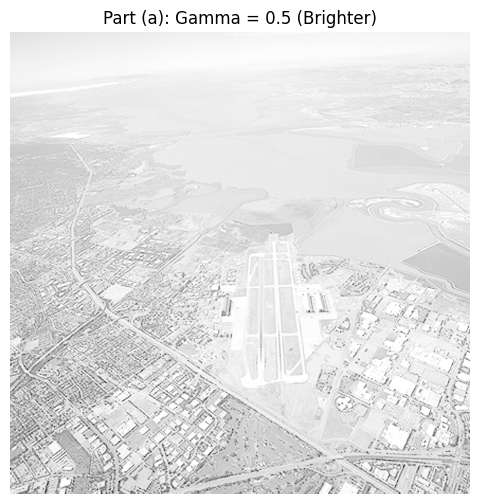

In [33]:
plt.figure(figsize=(6, 6))
plt.imshow(s_a, cmap='gray', vmin=0, vmax=1)
plt.title('Part (a): Gamma = 0.5 (Brighter)')
plt.axis('off')
plt.show()

3. Show Part (b)

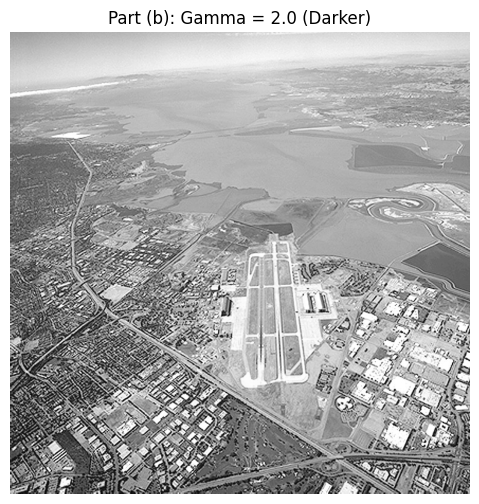

In [34]:
plt.figure(figsize=(6, 6))
plt.imshow(s_b, cmap='gray', vmin=0, vmax=1)
plt.title('Part (b): Gamma = 2.0 (Darker)')
plt.axis('off')
plt.show()

4. Show Part (c)

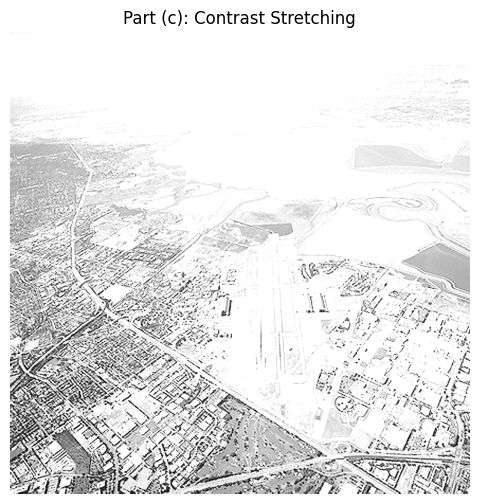

In [35]:
plt.figure(figsize=(6, 6))
plt.imshow(s_c, cmap='gray', vmin=0, vmax=1)
plt.title('Part (c): Contrast Stretching')
plt.axis('off')
plt.show()